### HR-Analysis : Imbalanced Dataset


In [125]:
#Senbagaraman - https://github.com/senbagaraman04/ml-basics/tree/main/2023

## Import the Necessary Libraries

In [126]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Read the Data

In [127]:
df = pd.read_csv('./HR_Analytics.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Check for missing/null values

In [128]:
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [129]:
print(df.isna().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no missing/NA values in the dataset.

In [130]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'DailyRate'}>,
        <AxesSubplot: title={'center': 'DistanceFromHome'}>,
        <AxesSubplot: title={'center': 'Education'}>,
        <AxesSubplot: title={'center': 'EmployeeCount'}>],
       [<AxesSubplot: title={'center': 'EmployeeNumber'}>,
        <AxesSubplot: title={'center': 'EnvironmentSatisfaction'}>,
        <AxesSubplot: title={'center': 'HourlyRate'}>,
        <AxesSubplot: title={'center': 'JobInvolvement'}>,
        <AxesSubplot: title={'center': 'JobLevel'}>],
       [<AxesSubplot: title={'center': 'JobSatisfaction'}>,
        <AxesSubplot: title={'center': 'MonthlyIncome'}>,
        <AxesSubplot: title={'center': 'MonthlyRate'}>,
        <AxesSubplot: title={'center': 'NumCompaniesWorked'}>,
        <AxesSubplot: title={'center': 'PercentSalaryHike'}>],
       [<AxesSubplot: title={'center': 'PerformanceRating'}>,
        <AxesSubplot: title={'center': 'RelationshipSatisfaction'}>

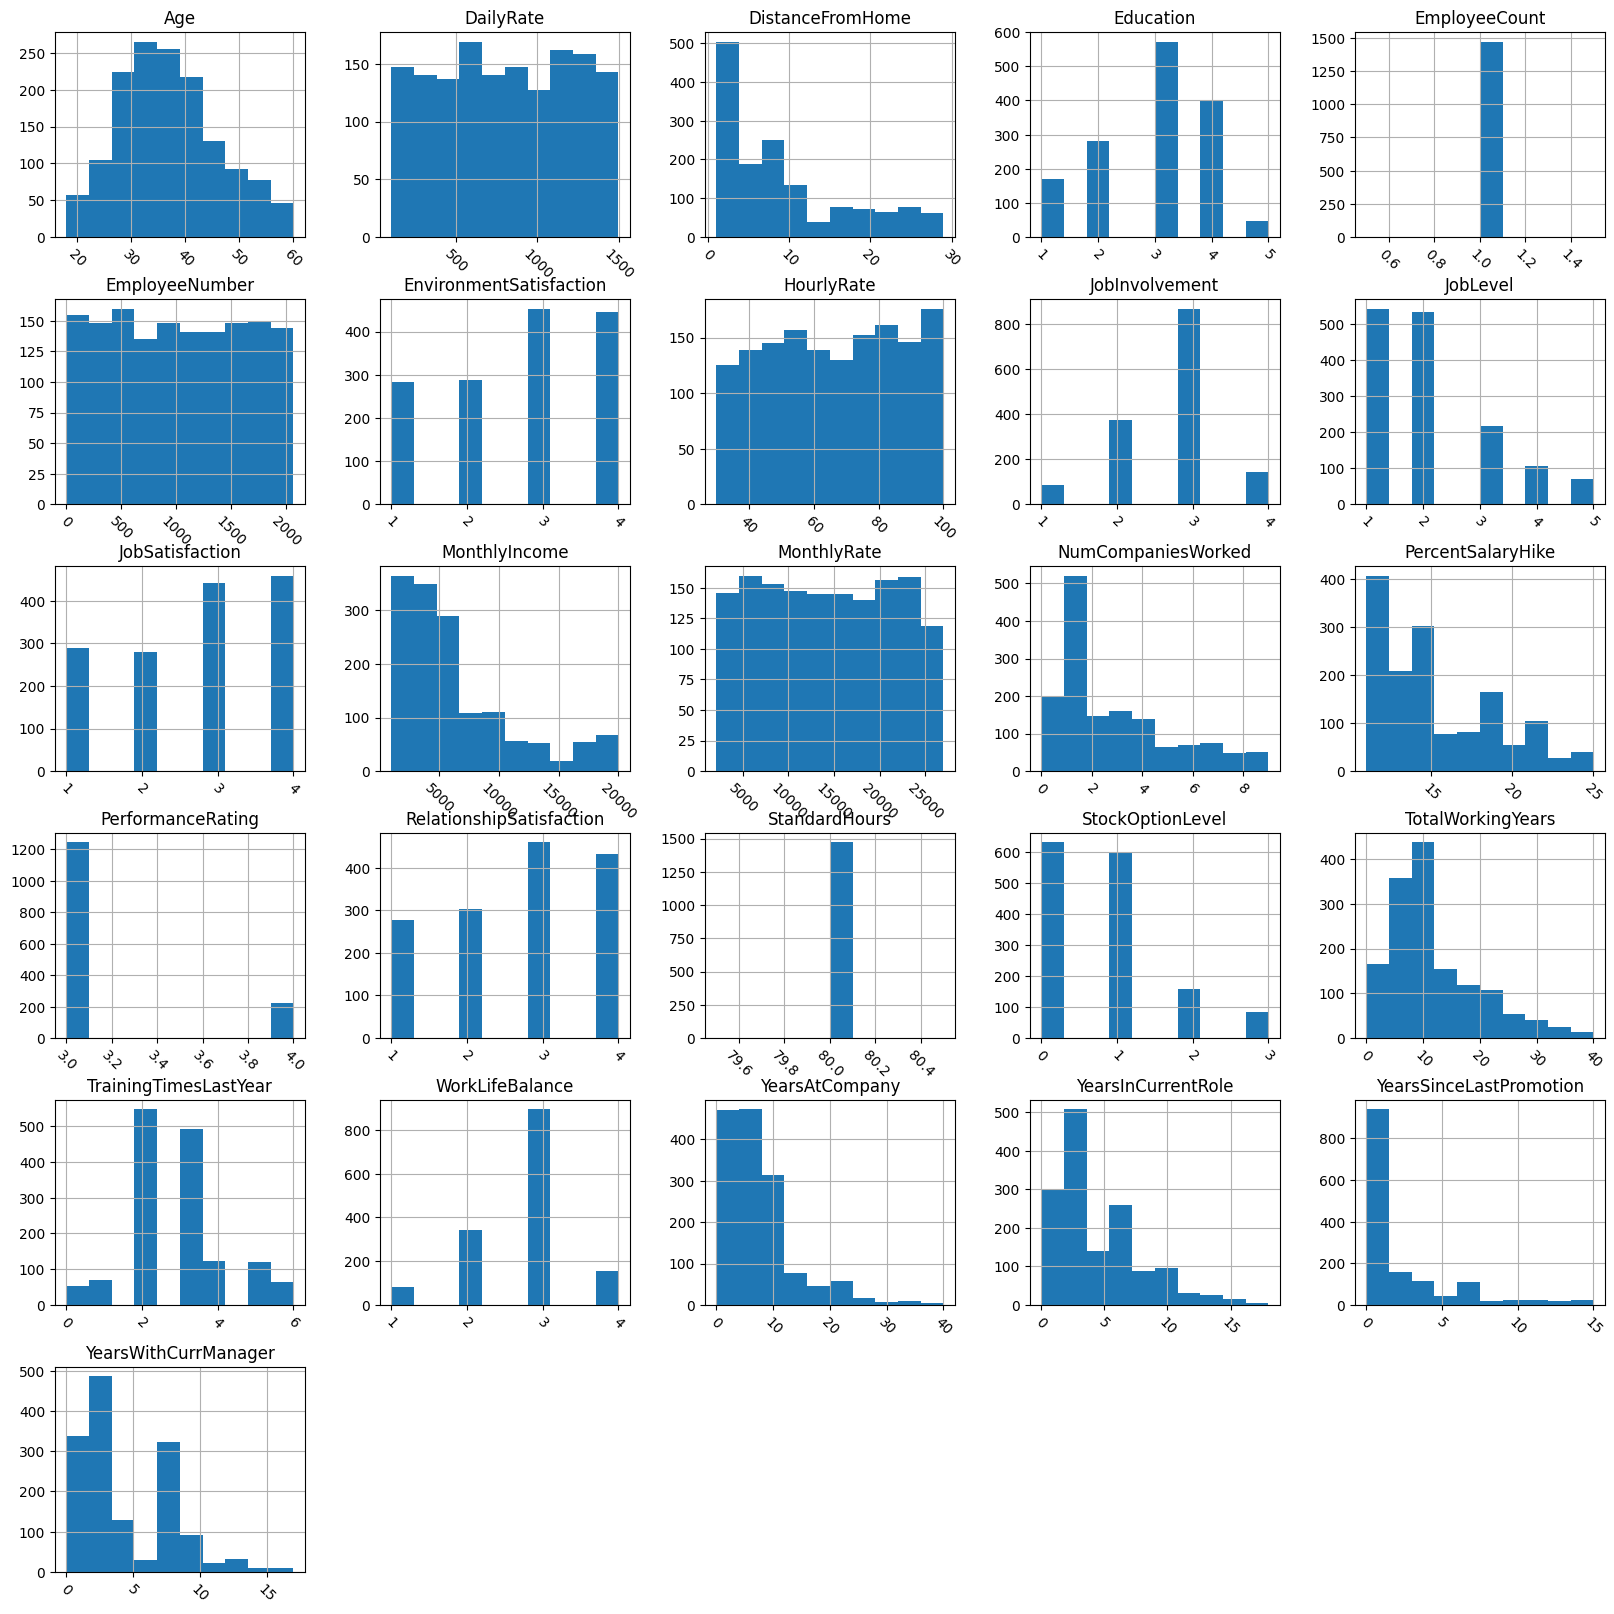

In [131]:
df.hist(figsize=(20,20), xrot=-45)

There are some categorical values like ```business travel```, ```department``` , ```education```. convert these into the nuerical ones using Label encoder.
#### Label Encoder: 
Encode target labels with value between 0 and n_classes-1.



In [132]:
# from sklearn.preprocessing import LabelEncoder


# for col in df.select_dtypes(['object']).columns:
#     le = LabelEncoder()
#     label = le.fit_transform(df[col])
#     df.drop(col,axis=1, inplace=True)
#     df[col]= label

And we also found some columns are not needed based on the values it has, ```over18```, ```standardworkinghrs```, ```count```, ```number```. Drop those columns

In [133]:
df.drop('Over18', axis=1, inplace=True)
df.drop('EmployeeCount', axis=1, inplace=True)
df.drop('StandardHours', axis=1, inplace=True)
df.drop('EmployeeNumber', axis=1, inplace=True)

In [134]:
df.select_dtypes(['object']).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

<AxesSubplot: xlabel='BusinessTravel', ylabel='count'>

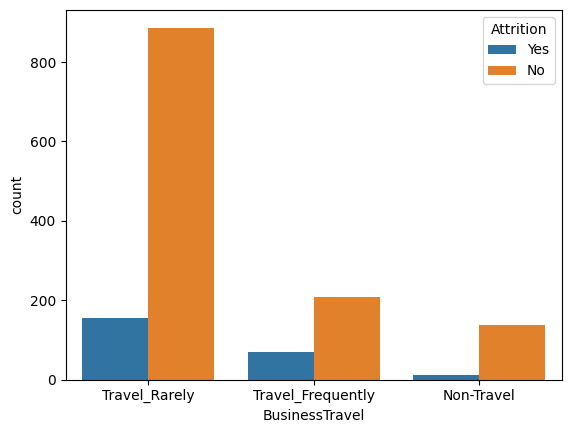

In [135]:
sns.countplot(x = 'BusinessTravel', hue = 'Attrition', data = df)


In [136]:
print(df['BusinessTravel'].value_counts())


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


In [137]:
df['BusinessTravel'] = df['BusinessTravel'].replace(['Non-Travel'], 'Travel_Rarely')


<AxesSubplot: xlabel='Department', ylabel='count'>

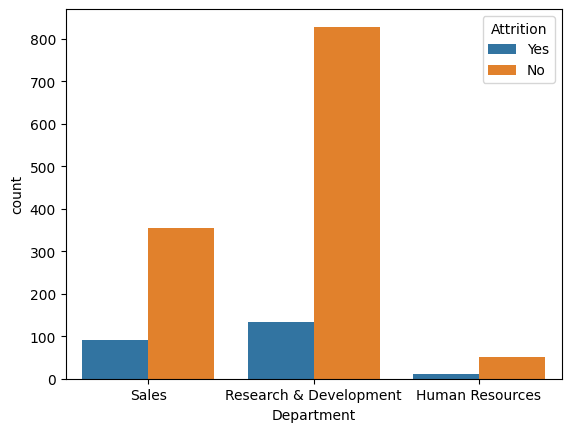

In [138]:
sns.countplot(x = 'Department', hue = 'Attrition', data = df)

<AxesSubplot: xlabel='count', ylabel='EducationField'>

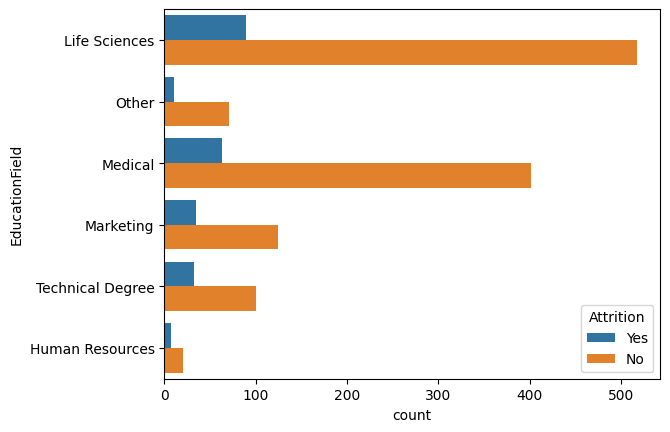

In [139]:
sns.countplot(y = 'EducationField',hue = 'Attrition', data = df)


<AxesSubplot: xlabel='count', ylabel='JobRole'>

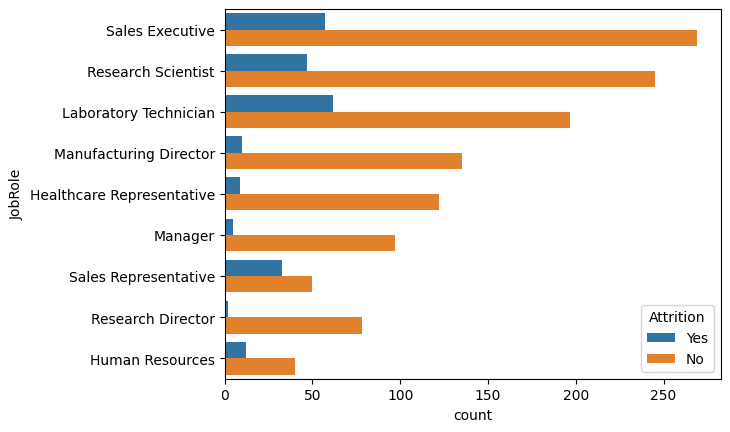

In [140]:
sns.countplot(y = 'JobRole', hue = 'Attrition', data = df)


In [141]:
#df['JobRole'] = df['JobRole'].replace(['Sales Representative'], 'Sales Executive')
#df['JobRole'] = df['JobRole'].replace(['Manufacturing Director'], 'Director')
#df['JobRole'] = df['JobRole'].replace(['Research Director'], 'Director')

<AxesSubplot: xlabel='MaritalStatus', ylabel='count'>

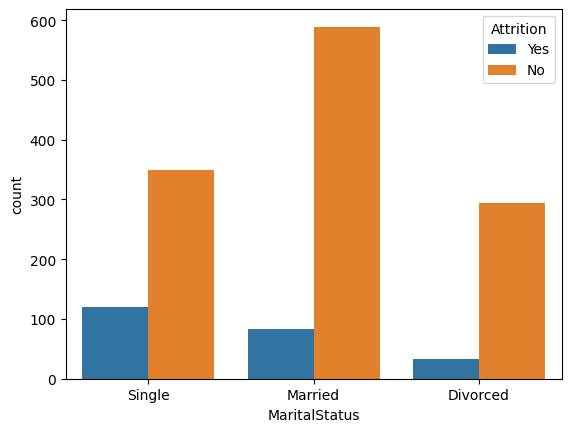

In [142]:
sns.countplot(x = 'MaritalStatus', hue = 'Attrition' , data = df)


In [143]:
df['MaritalStatus'] = df['MaritalStatus'].replace(['Divorced'], 'Single')


<AxesSubplot: xlabel='OverTime', ylabel='count'>

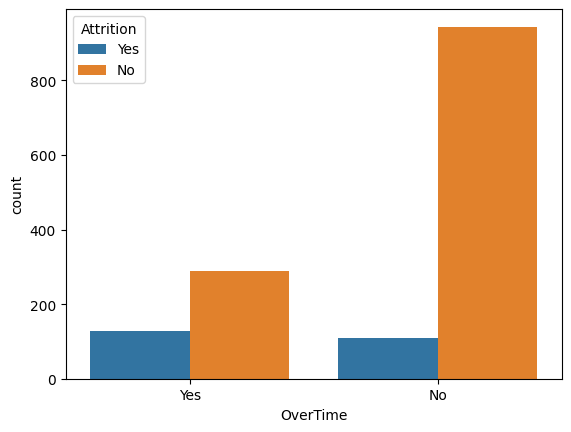

In [144]:
sns.countplot(x = 'OverTime', hue = 'Attrition' , data = df)


<AxesSubplot: xlabel='Gender', ylabel='count'>

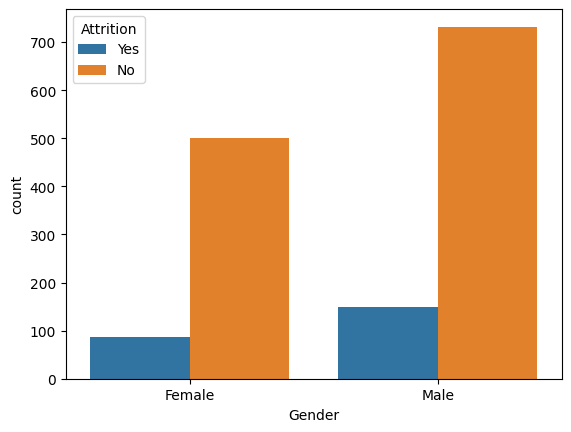

In [145]:
sns.countplot(x = 'Gender', hue = 'Attrition' , data = df)


In [146]:
from sklearn.preprocessing import LabelEncoder


for col in df.select_dtypes(['object']).columns:
    le = LabelEncoder()
    label = le.fit_transform(df[col])
    df.drop(col,axis=1, inplace=True)
    df[col]= label

## Find the target variable


In [147]:
target = 'Attrition'
X = df.loc[:, df.columns != target]
Y = df.loc[:, df.columns == target]

<AxesSubplot: xlabel='Attrition', ylabel='count'>

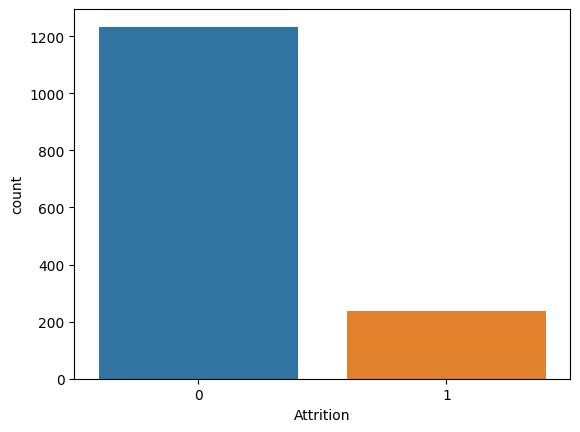

In [148]:
sns.countplot(x=target, data = df)

In [149]:
print(df[target].value_counts())

0    1233
1     237
Name: Attrition, dtype: int64


We have sample of 1233 No attributes and 237 of yes attributes. Converting it into percentage roughly equals to the following numbers,

In [150]:
print("%of 0 (No)", 100*(1233/float(df.shape[0])))
print("%of 1 (Yes)", 100*(237/float(df.shape[0])))

%of 0 (No) 83.87755102040816
%of 1 (Yes) 16.122448979591837


<AxesSubplot: >

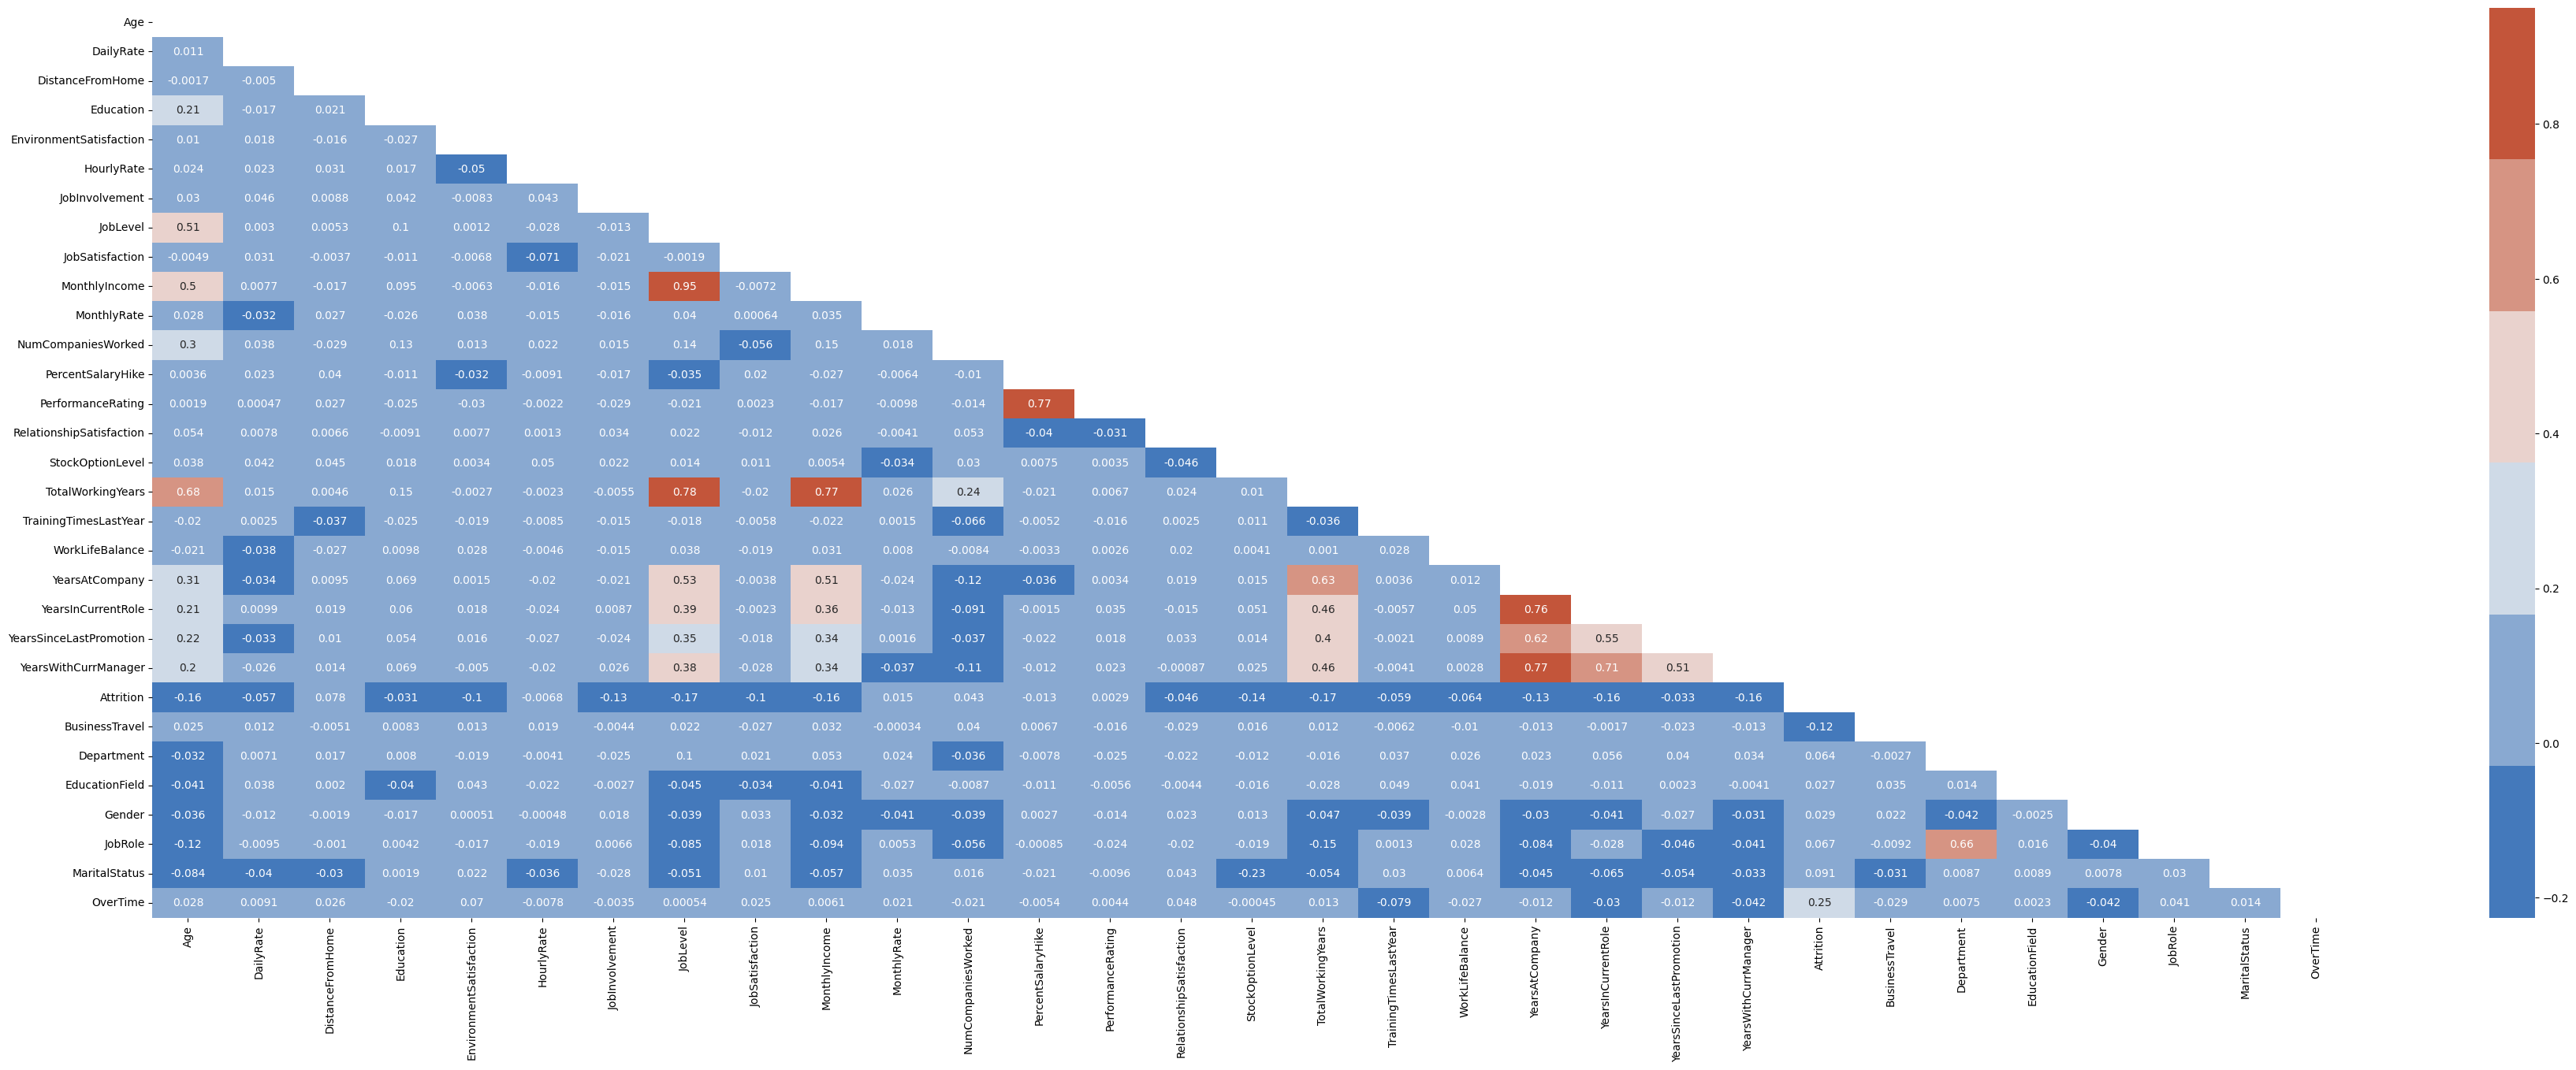

In [151]:
corr = df.corr()

f, ax = plt.subplots(figsize=(45, 15))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(250, 20)

# Draw the heatmap

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

Now split the dataset,

## Split the Dataset

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 30)

df_LR = LogisticRegression().fit(X_train, y_train)
y_train_predLR = df_LR.predict(X_train)
y_test_predLR = df_LR.predict(X_test)

Find the metrics on the predicted dataset,

```Accuracy``` : The ratio of correct predictions (TP + TN) to the total number of predictions (TP+TN+FP+FN)
 ie., ```[(tp+tn)/(total_count)]```.

```Precision```: The fraction of positive cases correctly identified. 
 ie .. ```[(TP/TP+FP)]

```Recall``` : The fraction of cases that are classified as positive, that are actually positive.

```F1 Score``` : An overall metric tht combines the Accuracy and Precision score (Higher the value, better the model)

In [153]:
from sklearn import metrics

print("Accuracy = ", metrics.accuracy_score(y_test, y_test_predLR)) 
print("Precision = ", metrics.precision_score(y_test, y_test_predLR)) 
print(" Recall = ", metrics.recall_score(y_test, y_test_predLR)) 
print("F1 Score = ", metrics.f1_score(y_test, y_test_predLR)) 

#Accuracy =  0.8435374149659864
#Precision =  0.5
#Recall =  0.014492753623188406
# F1 Score =  0.028169014084507046

Accuracy =  0.8435374149659864
Precision =  0.5
 Recall =  0.014492753623188406
F1 Score =  0.028169014084507046


## Sampling

In [154]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 30)
X_dn, y_dn = rus.fit_resample(X, Y)

# Oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 30)
X_up, y_up = ros.fit_resample(X, Y)

In [155]:
# Import the required packages 
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_up, y_up, random_state=42)

X_train_dn, X_test_dn, y_train_dn, y_test_dn = train_test_split(X_dn, y_dn, random_state=42)



## LR - with prediction done on Plain Test 

In [156]:


# Define the parameter grid and fit the model
param_grid = {'logisticregression__C': range(0,100)}
model_lr = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

grid_lr = GridSearchCV(model_lr, param_grid=param_grid, scoring=["roc_auc", 'average_precision', 'accuracy'],refit='roc_auc')
grid_lr.fit(X_train_dn, y_train_dn)


# Obtain the performance scores
predictions = grid_lr.predict(X_test)
 
# Store and append the classifier performance metrics to the results DataFrame
results_df = pd.DataFrame(
    data=[["LR dn", accuracy_score(y_test, predictions),
           metrics.precision_score(y_test, predictions),
           metrics.recall_score(y_test, predictions), 
           metrics.f1_score(y_test, predictions), grid_lr.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

print(results_df)

   Model  Accuracy  Precision    Recall  F1 Score        CV
0  LR dn  0.702948   0.315476  0.768116  0.447257  0.830952


In [157]:
# Define the parameter grid and fit the model
param_grid = {'logisticregression__C': range(0,100)}
model_lr = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

grid_lr = GridSearchCV(model_lr, param_grid=param_grid, scoring=["roc_auc", 'average_precision', 'accuracy'],refit='roc_auc')
grid_lr.fit(X_train, y_train)


# Obtain the performance scores
predictions = grid_lr.predict(X_test)
 
# Store and append the classifier performance metrics to the results DataFrame
results_df3 = pd.DataFrame(
    data=[["LR", accuracy_score(y_test, predictions),
           metrics.precision_score(y_test, predictions),
           metrics.recall_score(y_test, predictions), 
           metrics.f1_score(y_test, predictions), grid_lr.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(results_df3, ignore_index=True)

print(results_df)

   Model  Accuracy  Precision    Recall  F1 Score        CV
0  LR dn  0.702948   0.315476  0.768116  0.447257  0.830952
1     LR  0.870748   0.650000  0.376812  0.477064  0.833191


In [158]:
# Define the parameter grid and fit the model
param_grid = {'logisticregression__C': range(0,100)}
model_lr = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Use AUC score as parameter
grid_lr = GridSearchCV(model_lr, param_grid=param_grid, scoring=["roc_auc", 'average_precision', 'accuracy'],refit='roc_auc')
grid_lr.fit(X_train_up, y_train_up)
 

predictions = grid_lr.predict(X_test)
 
# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["LR Up", accuracy_score(y_test, predictions),
           metrics.precision_score(y_test, predictions),
           metrics.recall_score(y_test, predictions), 
           metrics.f1_score(y_test, predictions), grid_lr.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

   Model  Accuracy  Precision    Recall  F1 Score        CV
0  LR dn  0.702948   0.315476  0.768116  0.447257  0.830952
1     LR  0.870748   0.650000  0.376812  0.477064  0.833191
2  LR Up  0.750567   0.352518  0.710145  0.471154  0.841132


In [159]:
# Define the parameter grid and fit the model
from sklearn.preprocessing import MinMaxScaler


param_grid = {'logisticregression__C': range(0,100)}
model_lr = make_pipeline(MinMaxScaler(), LogisticRegression(max_iter=1000))

# Use AUC score as parameter
grid_lr = GridSearchCV(model_lr, param_grid=param_grid, scoring=["roc_auc", 'average_precision', 'accuracy'],refit='roc_auc')
grid_lr.fit(X_train_up, y_train_up)
 

predictions = grid_lr.predict(X_test)
 
# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["LR Up(min) ", accuracy_score(y_test, predictions),
           metrics.precision_score(y_test, predictions),
           metrics.recall_score(y_test,predictions), 
           metrics.f1_score(y_test, predictions), grid_lr.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

         Model  Accuracy  Precision    Recall  F1 Score        CV
0        LR dn  0.702948   0.315476  0.768116  0.447257  0.830952
1           LR  0.870748   0.650000  0.376812  0.477064  0.833191
2        LR Up  0.750567   0.352518  0.710145  0.471154  0.841132
3  LR Up(min)   0.757370   0.362319  0.724638  0.483092  0.841313


In [160]:
# Define the parameter grid and fit the model
from sklearn.preprocessing import MinMaxScaler


param_grid = {'logisticregression__C': range(0,100)}
model_lr = make_pipeline(MinMaxScaler(), LogisticRegression(max_iter=1000))


# Use AUC score as parameter
grid_lr = GridSearchCV(model_lr, param_grid=param_grid, scoring=["roc_auc", 'average_precision', 'accuracy'],refit='roc_auc')
grid_lr.fit(X_train_dn, y_train_dn)


predictions = grid_lr.predict(X_test)
 
# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["LR dn(min) ", accuracy_score(y_test, predictions),
           metrics.precision_score(y_test, predictions),
           metrics.recall_score(y_test, predictions), 
           metrics.f1_score(y_test, predictions), grid_lr.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

         Model  Accuracy  Precision    Recall  F1 Score        CV
0        LR dn  0.702948   0.315476  0.768116  0.447257  0.830952
1           LR  0.870748   0.650000  0.376812  0.477064  0.833191
2        LR Up  0.750567   0.352518  0.710145  0.471154  0.841132
3  LR Up(min)   0.757370   0.362319  0.724638  0.483092  0.841313
4  LR dn(min)   0.707483   0.319277  0.768116  0.451064  0.830952


In [161]:
# Define the parameter grid and fit the model
param_grid = {'kneighborsclassifier__n_neighbors': range(2,10)}
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
grid_knn = GridSearchCV(pipe, param_grid, scoring = 'roc_auc', verbose = 3)
grid_knn.fit(X_train_up, y_train_up)
best_knn_up = grid_knn.best_estimator_

# Obtain the performance scores
predictions = best_knn_up.predict(X_test)

# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["KNN up", accuracy_score(y_test, predictions),
           metrics.precision_score(y_test, predictions),
           metrics.recall_score(y_test, predictions), 
           metrics.f1_score(y_test, predictions), grid_knn.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END kneighborsclassifier__n_neighbors=2;, score=0.915 total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_neighbors=2;, score=0.912 total time=   0.0s
[CV 3/5] END kneighborsclassifier__n_neighbors=2;, score=0.917 total time=   0.0s
[CV 4/5] END kneighborsclassifier__n_neighbors=2;, score=0.899 total time=   0.0s
[CV 5/5] END kneighborsclassifier__n_neighbors=2;, score=0.894 total time=   0.0s
[CV 1/5] END kneighborsclassifier__n_neighbors=3;, score=0.899 total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_neighbors=3;, score=0.894 total time=   0.0s
[CV 3/5] END kneighborsclassifier__n_neighbors=3;, score=0.901 total time=   0.0s
[CV 4/5] END kneighborsclassifier__n_neighbors=3;, score=0.884 total time=   0.0s
[CV 5/5] END kneighborsclassifier__n_neighbors=3;, score=0.885 total time=   0.0s
[CV 1/5] END kneighborsclassifier__n_neighbors=4;, score=0.874 total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_n

In [162]:
# Define the parameter grid and fit the model
param_grid = {'kneighborsclassifier__n_neighbors': range(2,10)}
pipe = make_pipeline(MinMaxScaler(), KNeighborsClassifier())
grid_knn = GridSearchCV(pipe, param_grid, scoring = 'roc_auc', verbose = 3)
grid_knn.fit(X_train_up, y_train_up)
best_knn_upmin = grid_knn.best_estimator_

# Obtain the performance scores
predictions = best_knn_upmin.predict(X_test)

# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["KNN up(min)", accuracy_score(y_test, predictions),
           metrics.precision_score(y_test, predictions),
           metrics.recall_score(y_test, predictions), 
           metrics.f1_score(y_test, predictions), grid_knn.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END kneighborsclassifier__n_neighbors=2;, score=0.895 total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_neighbors=2;, score=0.897 total time=   0.0s
[CV 3/5] END kneighborsclassifier__n_neighbors=2;, score=0.911 total time=   0.0s
[CV 4/5] END kneighborsclassifier__n_neighbors=2;, score=0.910 total time=   0.0s
[CV 5/5] END kneighborsclassifier__n_neighbors=2;, score=0.888 total time=   0.0s
[CV 1/5] END kneighborsclassifier__n_neighbors=3;, score=0.888 total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_neighbors=3;, score=0.900 total time=   0.0s
[CV 3/5] END kneighborsclassifier__n_neighbors=3;, score=0.888 total time=   0.0s
[CV 4/5] END kneighborsclassifier__n_neighbors=3;, score=0.894 total time=   0.0s
[CV 5/5] END kneighborsclassifier__n_neighbors=3;, score=0.887 total time=   0.0s
[CV 1/5] END kneighborsclassifier__n_neighbors=4;, score=0.873 total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_n

In [163]:
# Define the parameter grid and fit the model
param_grid = {'kneighborsclassifier__n_neighbors': range(2,10)}
pipe = make_pipeline(MinMaxScaler(), KNeighborsClassifier())
grid_knn = GridSearchCV(pipe, param_grid, scoring = 'roc_auc', verbose = 3)
grid_knn.fit(X_train_dn, y_train_dn)
best_knn_dnmin = grid_knn.best_estimator_

# Obtain the performance scores
predictions = best_knn_dnmin.predict(X_test)

# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["KNN dn(min) ", accuracy_score(y_test, predictions),
           metrics.precision_score(y_test, predictions),
           metrics.recall_score(y_test, predictions), 
           metrics.f1_score(y_test, predictions), grid_knn.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END kneighborsclassifier__n_neighbors=2;, score=0.746 total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_neighbors=2;, score=0.667 total time=   0.0s
[CV 3/5] END kneighborsclassifier__n_neighbors=2;, score=0.681 total time=   0.0s
[CV 4/5] END kneighborsclassifier__n_neighbors=2;, score=0.727 total time=   0.0s
[CV 5/5] END kneighborsclassifier__n_neighbors=2;, score=0.533 total time=   0.0s
[CV 1/5] END kneighborsclassifier__n_neighbors=3;, score=0.740 total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_neighbors=3;, score=0.667 total time=   0.0s
[CV 3/5] END kneighborsclassifier__n_neighbors=3;, score=0.678 total time=   0.0s
[CV 4/5] END kneighborsclassifier__n_neighbors=3;, score=0.763 total time=   0.0s
[CV 5/5] END kneighborsclassifier__n_neighbors=3;, score=0.582 total time=   0.0s
[CV 1/5] END kneighborsclassifier__n_neighbors=4;, score=0.756 total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_n

In [164]:
# Define the parameter grid and fit the model
param_grid = {'kneighborsclassifier__n_neighbors': range(2,10)}
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
grid_knn = GridSearchCV(pipe, param_grid, scoring = 'roc_auc', verbose = 3)
grid_knn.fit(X_train_dn, y_train_dn)
best_knn_dn = grid_knn.best_estimator_

# Obtain the performance scores
predictions = best_knn_dn.predict(X_test)

# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["KNN dn", accuracy_score(y_test, predictions),
           metrics.precision_score(y_test, predictions),
           metrics.recall_score(y_test, predictions), 
           metrics.f1_score(y_test, predictions), grid_knn.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END kneighborsclassifier__n_neighbors=2;, score=0.713 total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_neighbors=2;, score=0.636 total time=   0.0s
[CV 3/5] END kneighborsclassifier__n_neighbors=2;, score=0.606 total time=   0.0s
[CV 4/5] END kneighborsclassifier__n_neighbors=2;, score=0.690 total time=   0.0s
[CV 5/5] END kneighborsclassifier__n_neighbors=2;, score=0.616 total time=   0.0s
[CV 1/5] END kneighborsclassifier__n_neighbors=3;, score=0.774 total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_neighbors=3;, score=0.669 total time=   0.0s
[CV 3/5] END kneighborsclassifier__n_neighbors=3;, score=0.586 total time=   0.0s
[CV 4/5] END kneighborsclassifier__n_neighbors=3;, score=0.712 total time=   0.0s
[CV 5/5] END kneighborsclassifier__n_neighbors=3;, score=0.696 total time=   0.0s
[CV 1/5] END kneighborsclassifier__n_neighbors=4;, score=0.801 total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_n

In [165]:
# Define the parameter grid and fit the model
param_grid = {'kneighborsclassifier__n_neighbors': range(2,10)}
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
grid_knn = GridSearchCV(pipe, param_grid, scoring = 'roc_auc', verbose = 3)
grid_knn.fit(X_train, y_train)
best_knn= grid_knn.best_estimator_

# Obtain the performance scores
predictions = best_knn.predict(X_test)

# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["KNN ", accuracy_score(y_test, predictions),
           metrics.precision_score(y_test, predictions),
           metrics.recall_score(y_test, predictions), 
           metrics.f1_score(y_test, predictions), grid_knn.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END kneighborsclassifier__n_neighbors=2;, score=0.643 total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_neighbors=2;, score=0.603 total time=   0.0s
[CV 3/5] END kneighborsclassifier__n_neighbors=2;, score=0.641 total time=   0.0s
[CV 4/5] END kneighborsclassifier__n_neighbors=2;, score=0.595 total time=   0.0s
[CV 5/5] END kneighborsclassifier__n_neighbors=2;, score=0.563 total time=   0.0s
[CV 1/5] END kneighborsclassifier__n_neighbors=3;, score=0.685 total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_neighbors=3;, score=0.667 total time=   0.0s
[CV 3/5] END kneighborsclassifier__n_neighbors=3;, score=0.647 total time=   0.0s
[CV 4/5] END kneighborsclassifier__n_neighbors=3;, score=0.618 total time=   0.0s
[CV 5/5] END kneighborsclassifier__n_neighbors=3;, score=0.573 total time=   0.0s
[CV 1/5] END kneighborsclassifier__n_neighbors=4;, score=0.688 total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_n

In [166]:
# Import the required packages
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Define the parameter grid and fit the model
pipe = Pipeline([("scaler", StandardScaler()), ("svm", SVC())])
param_grid = {'svm__C': range(0,10), 'svm__gamma': range(0,10)}
grid_svc = GridSearchCV(pipe, param_grid=param_grid, n_jobs = -1)
grid_svc.fit(X_train, y_train)
best_svc= grid_svc.best_estimator_

# Obtain the performance scores
predictions = best_svc.predict(X_test)

# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["SVC", accuracy_score(y_test, predictions),
           metrics.precision_score(y_test, predictions),
           metrics.recall_score(y_test, predictions), 
           metrics.f1_score(y_test, predictions), grid_svc.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

           Model  Accuracy  Precision    Recall  F1 Score        CV
0          LR dn  0.702948   0.315476  0.768116  0.447257  0.830952
1             LR  0.870748   0.650000  0.376812  0.477064  0.833191
2          LR Up  0.750567   0.352518  0.710145  0.471154  0.841132
3    LR Up(min)   0.757370   0.362319  0.724638  0.483092  0.841313
4    LR dn(min)   0.707483   0.319277  0.768116  0.451064  0.830952
5         KNN up  0.968254   0.876712  0.927536  0.901408  0.907242
6    KNN up(min)  0.961451   0.833333  0.942029  0.884354  0.900171
7   KNN dn(min)   0.764172   0.350427  0.594203  0.440860  0.750159
8         KNN dn  0.736961   0.344371  0.753623  0.472727  0.739048
9           KNN   0.845805   0.600000  0.043478  0.081081  0.709335
10           SVC  0.843537   0.000000  0.000000  0.000000  0.836737


In [167]:
# Import the required packages
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Define the parameter grid and fit the model
pipe = Pipeline([("scaler", StandardScaler()), ("svm", SVC())])
param_grid = {'svm__C': range(0,10), 'svm__gamma': range(0,10)}
grid_svc = GridSearchCV(pipe, param_grid=param_grid, n_jobs = -1)
grid_svc.fit(X_train_dn, y_train_dn)
best_svc_dn= grid_svc.best_estimator_

# Obtain the performance scores
predictions = best_svc_dn.predict(X_test)

# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["SVC dn", accuracy_score(y_test, predictions),
           metrics.precision_score(y_test, predictions),
           metrics.recall_score(y_test, predictions), 
           metrics.f1_score(y_test, predictions), grid_svc.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

           Model  Accuracy  Precision    Recall  F1 Score        CV
0          LR dn  0.702948   0.315476  0.768116  0.447257  0.830952
1             LR  0.870748   0.650000  0.376812  0.477064  0.833191
2          LR Up  0.750567   0.352518  0.710145  0.471154  0.841132
3    LR Up(min)   0.757370   0.362319  0.724638  0.483092  0.841313
4    LR dn(min)   0.707483   0.319277  0.768116  0.451064  0.830952
5         KNN up  0.968254   0.876712  0.927536  0.901408  0.907242
6    KNN up(min)  0.961451   0.833333  0.942029  0.884354  0.900171
7   KNN dn(min)   0.764172   0.350427  0.594203  0.440860  0.750159
8         KNN dn  0.736961   0.344371  0.753623  0.472727  0.739048
9           KNN   0.845805   0.600000  0.043478  0.081081  0.709335
10           SVC  0.843537   0.000000  0.000000  0.000000  0.836737
11        SVC dn  0.950113   1.000000  0.681159  0.810345  0.501408


In [168]:
# Define the parameter grid and fit the model
pipe = Pipeline([("scaler", StandardScaler()), ("svm", SVC())])
param_grid = {'svm__C': range(0,10), 'svm__gamma': range(0,10)}
grid_svc = GridSearchCV(pipe, param_grid=param_grid, n_jobs = -1)
grid_svc.fit(X_train_up, y_train_up)
best_svc_up= grid_svc.best_estimator_
print(best_svc_up)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_svc.best_score_ * 100, 3)))
predictions = best_svc_up.predict(X_test)
print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test, y_pred = predictions) * 100, 3)))


# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["SVC up", accuracy_score(y_test, predictions),
           metrics.precision_score(y_test, predictions),
           metrics.recall_score(y_test, predictions), 
           metrics.f1_score(y_test, predictions), grid_svc.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)


# Obtain the predicted labels for the test dataset
y_pred= best_svc_up.predict(X_test_up)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=1, gamma=1))])
Cross-validated best score 97.62%
Test score: 100.0%
           Model  Accuracy  Precision    Recall  F1 Score        CV
0          LR dn  0.702948   0.315476  0.768116  0.447257  0.830952
1             LR  0.870748   0.650000  0.376812  0.477064  0.833191
2          LR Up  0.750567   0.352518  0.710145  0.471154  0.841132
3    LR Up(min)   0.757370   0.362319  0.724638  0.483092  0.841313
4    LR dn(min)   0.707483   0.319277  0.768116  0.451064  0.830952
5         KNN up  0.968254   0.876712  0.927536  0.901408  0.907242
6    KNN up(min)  0.961451   0.833333  0.942029  0.884354  0.900171
7   KNN dn(min)   0.764172   0.350427  0.594203  0.440860  0.750159
8         KNN dn  0.736961   0.344371  0.753623  0.472727  0.739048
9           KNN   0.845805   0.600000  0.043478  0.081081  0.709335
10           SVC  0.843537   0.000000  0.000000  0.000000  0.836737
11        SVC dn  0.950113   1.000000  0.681159  0.81034

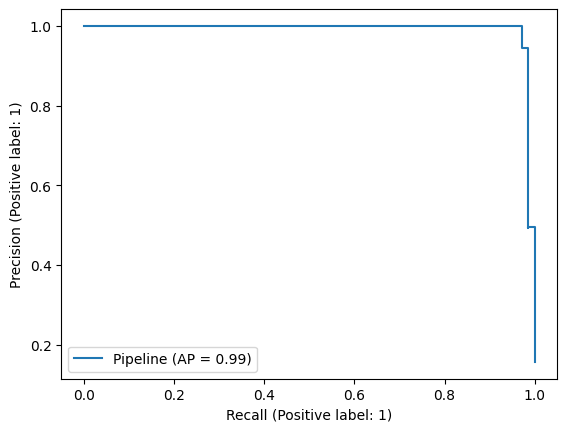

In [169]:
y_pred= best_svc_up.predict(X_test)
pr_svc = plot_precision_recall_curve(best_svc_up, X_test, y_test)

In [170]:
# Define the parameter grid and fit the model
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
param_grid = {'svm__C': range(0,10), 'svm__gamma': range(0,10)}
grid_svc = GridSearchCV(pipe, param_grid=param_grid, n_jobs = -1)
grid_svc.fit(X_train_up, y_train_up)
best_svc_upmin= grid_svc.best_estimator_
print(best_svc_upmin)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_svc.best_score_ * 100, 3)))
predictions = best_svc_upmin.predict(X_test)
print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test, y_pred = predictions) * 100, 3)))


# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["SVC up(minMax) ", accuracy_score(y_test, predictions),
           metrics.precision_score(y_test, predictions),
           metrics.recall_score(y_test, predictions), 
           metrics.f1_score(y_test, predictions), grid_svc.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)


# # Obtain the predicted labels for the test dataset
# y_pred= best_svc_upmin.predict(X_test_up)
# print(y_pred)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svm', SVC(C=1, gamma=2))])
Cross-validated best score 97.728%
Test score: 100.0%
              Model  Accuracy  Precision    Recall  F1 Score        CV
0             LR dn  0.702948   0.315476  0.768116  0.447257  0.830952
1                LR  0.870748   0.650000  0.376812  0.477064  0.833191
2             LR Up  0.750567   0.352518  0.710145  0.471154  0.841132
3       LR Up(min)   0.757370   0.362319  0.724638  0.483092  0.841313
4       LR dn(min)   0.707483   0.319277  0.768116  0.451064  0.830952
5            KNN up  0.968254   0.876712  0.927536  0.901408  0.907242
6       KNN up(min)  0.961451   0.833333  0.942029  0.884354  0.900171
7      KNN dn(min)   0.764172   0.350427  0.594203  0.440860  0.750159
8            KNN dn  0.736961   0.344371  0.753623  0.472727  0.739048
9              KNN   0.845805   0.600000  0.043478  0.081081  0.709335
10              SVC  0.843537   0.000000  0.000000  0.000000  0.836737
11           SVC dn  

In [171]:
# Define the parameter grid and fit the model
from sklearn.tree import DecisionTreeClassifier

param_grid = {'criterion':['gini','entropy'], 'max_depth': np.arange(4,11), 'random_state': [42]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'roc_auc', n_jobs = -1)
grid_tree.fit(X_train, y_train)
best_tree = grid_tree.best_estimator_
print(best_tree)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_tree.best_score_ * 100, 3)))
predictions = best_tree.predict(X_test)
# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["DT", accuracy_score(y_test, predictions),
           metrics.precision_score(y_test, predictions),
           metrics.recall_score(y_test, predictions), 
           metrics.f1_score(y_test, predictions), grid_tree.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
Cross-validated best score 68.359%
              Model  Accuracy  Precision    Recall  F1 Score        CV
0             LR dn  0.702948   0.315476  0.768116  0.447257  0.830952
1                LR  0.870748   0.650000  0.376812  0.477064  0.833191
2             LR Up  0.750567   0.352518  0.710145  0.471154  0.841132
3       LR Up(min)   0.757370   0.362319  0.724638  0.483092  0.841313
4       LR dn(min)   0.707483   0.319277  0.768116  0.451064  0.830952
5            KNN up  0.968254   0.876712  0.927536  0.901408  0.907242
6       KNN up(min)  0.961451   0.833333  0.942029  0.884354  0.900171
7      KNN dn(min)   0.764172   0.350427  0.594203  0.440860  0.750159
8            KNN dn  0.736961   0.344371  0.753623  0.472727  0.739048
9              KNN   0.845805   0.600000  0.043478  0.081081  0.709335
10              SVC  0.843537   0.000000  0.000000  0.000000  0.836737
11           SVC dn  0.950113   1.00000

In [172]:
# Define the parameter grid and fit the model
from sklearn.tree import DecisionTreeClassifier

param_grid = {'criterion':['gini','entropy'], 'max_depth': np.arange(4,11), 'random_state': [42]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'roc_auc', n_jobs = -1)
grid_tree.fit(X_train_dn, y_train_dn)
best_tree_dn = grid_tree.best_estimator_
print(best_tree_dn)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_tree.best_score_ * 100, 3)))
predictions = best_tree_dn.predict(X_test)
print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test, y_pred = predictions) * 100, 3)))
# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["DT dn", accuracy_score(y_test, predictions),
           metrics.precision_score(y_test, predictions),
           metrics.recall_score(y_test, predictions), 
           metrics.f1_score(y_test, predictions), grid_tree.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

DecisionTreeClassifier(max_depth=7, random_state=42)
Cross-validated best score 64.579%
Test score: 31.285%
              Model  Accuracy  Precision    Recall  F1 Score        CV
0             LR dn  0.702948   0.315476  0.768116  0.447257  0.830952
1                LR  0.870748   0.650000  0.376812  0.477064  0.833191
2             LR Up  0.750567   0.352518  0.710145  0.471154  0.841132
3       LR Up(min)   0.757370   0.362319  0.724638  0.483092  0.841313
4       LR dn(min)   0.707483   0.319277  0.768116  0.451064  0.830952
5            KNN up  0.968254   0.876712  0.927536  0.901408  0.907242
6       KNN up(min)  0.961451   0.833333  0.942029  0.884354  0.900171
7      KNN dn(min)   0.764172   0.350427  0.594203  0.440860  0.750159
8            KNN dn  0.736961   0.344371  0.753623  0.472727  0.739048
9              KNN   0.845805   0.600000  0.043478  0.081081  0.709335
10              SVC  0.843537   0.000000  0.000000  0.000000  0.836737
11           SVC dn  0.950113   1.000000

In [173]:
# Define the parameter grid and fit the model
param_grid = {'criterion':['gini','entropy'], 'max_depth': np.arange(4,11), 'random_state': [42]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'roc_auc', n_jobs = -1)
grid_tree.fit(X_train_up, y_train_up)
best_tree_up = grid_tree.best_estimator_
print(best_tree_up)

# Obtain the performance scores
predictions = best_tree_up.predict(X_test)
 

# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["DT up", accuracy_score(y_test, predictions),
           metrics.precision_score(y_test, predictions),
           metrics.recall_score(y_test, predictions), 
           metrics.f1_score(y_test, predictions), grid_tree.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)


print(results_df)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)
              Model  Accuracy  Precision    Recall  F1 Score        CV
0             LR dn  0.702948   0.315476  0.768116  0.447257  0.830952
1                LR  0.870748   0.650000  0.376812  0.477064  0.833191
2             LR Up  0.750567   0.352518  0.710145  0.471154  0.841132
3       LR Up(min)   0.757370   0.362319  0.724638  0.483092  0.841313
4       LR dn(min)   0.707483   0.319277  0.768116  0.451064  0.830952
5            KNN up  0.968254   0.876712  0.927536  0.901408  0.907242
6       KNN up(min)  0.961451   0.833333  0.942029  0.884354  0.900171
7      KNN dn(min)   0.764172   0.350427  0.594203  0.440860  0.750159
8            KNN dn  0.736961   0.344371  0.753623  0.472727  0.739048
9              KNN   0.845805   0.600000  0.043478  0.081081  0.709335
10              SVC  0.843537   0.000000  0.000000  0.000000  0.836737
11           SVC dn  0.950113   1.000000  0.681159  0.810345  0.501408
12 

In [174]:
# Define the parameter grid and fit the model
param_grid = {'n_estimators':range(0,100)}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'roc_auc', n_jobs = -1)
grid_rf.fit(X_train_dn, y_train_dn)
best_rf = grid_rf.best_estimator_
print(best_rf)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_rf.best_score_ * 100, 3)))
predictions = best_rf.predict(X_test)
print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test, y_pred = predictions) * 100, 3)))
# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["RF dn", accuracy_score(y_test, predictions),
           metrics.precision_score(y_test, predictions),
           metrics.recall_score(y_test, predictions), 
           metrics.f1_score(y_test, predictions), grid_rf.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

RandomForestClassifier(n_estimators=93)
Cross-validated best score 80.881%
Test score: 42.466%
              Model  Accuracy  Precision    Recall  F1 Score        CV
0             LR dn  0.702948   0.315476  0.768116  0.447257  0.830952
1                LR  0.870748   0.650000  0.376812  0.477064  0.833191
2             LR Up  0.750567   0.352518  0.710145  0.471154  0.841132
3       LR Up(min)   0.757370   0.362319  0.724638  0.483092  0.841313
4       LR dn(min)   0.707483   0.319277  0.768116  0.451064  0.830952
5            KNN up  0.968254   0.876712  0.927536  0.901408  0.907242
6       KNN up(min)  0.961451   0.833333  0.942029  0.884354  0.900171
7      KNN dn(min)   0.764172   0.350427  0.594203  0.440860  0.750159
8            KNN dn  0.736961   0.344371  0.753623  0.472727  0.739048
9              KNN   0.845805   0.600000  0.043478  0.081081  0.709335
10              SVC  0.843537   0.000000  0.000000  0.000000  0.836737
11           SVC dn  0.950113   1.000000  0.681159  0

In [175]:
# Define the parameter grid and fit the model
param_grid = {'n_estimators':range(0,100)}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'roc_auc', n_jobs = -1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
print(best_rf)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_rf.best_score_ * 100, 3)))
predictions = best_rf.predict(X_test)
# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["RF", accuracy_score(y_test, predictions),
           metrics.precision_score(y_test, predictions),
           metrics.recall_score(y_test, predictions), 
           metrics.f1_score(y_test, predictions), grid_rf.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

RandomForestClassifier(n_estimators=73)
Cross-validated best score 81.122%
              Model  Accuracy  Precision    Recall  F1 Score        CV
0             LR dn  0.702948   0.315476  0.768116  0.447257  0.830952
1                LR  0.870748   0.650000  0.376812  0.477064  0.833191
2             LR Up  0.750567   0.352518  0.710145  0.471154  0.841132
3       LR Up(min)   0.757370   0.362319  0.724638  0.483092  0.841313
4       LR dn(min)   0.707483   0.319277  0.768116  0.451064  0.830952
5            KNN up  0.968254   0.876712  0.927536  0.901408  0.907242
6       KNN up(min)  0.961451   0.833333  0.942029  0.884354  0.900171
7      KNN dn(min)   0.764172   0.350427  0.594203  0.440860  0.750159
8            KNN dn  0.736961   0.344371  0.753623  0.472727  0.739048
9              KNN   0.845805   0.600000  0.043478  0.081081  0.709335
10              SVC  0.843537   0.000000  0.000000  0.000000  0.836737
11           SVC dn  0.950113   1.000000  0.681159  0.810345  0.501408
12

In [176]:
# Define the parameter grid and fit the model
param_grid = {'n_estimators':range(0,100)}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'roc_auc', n_jobs = -1)
grid_rf.fit(X_train_up, y_train_up)
best_rf_up = grid_rf.best_estimator_
print(best_rf_up)

# Obtain the performance scores
predictions = best_rf_up.predict(X_test)
 

# Obtain the predicted labels for the test dataset
y_pred= best_rf_up.predict(X_test)
  

# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["RF up", accuracy_score(y_test, predictions),
           metrics.precision_score(y_test, predictions),
           metrics.recall_score(y_test, predictions), 
           metrics.f1_score(y_test, predictions), grid_rf.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

RandomForestClassifier(n_estimators=97)
              Model  Accuracy  Precision    Recall  F1 Score        CV
0             LR dn  0.702948   0.315476  0.768116  0.447257  0.830952
1                LR  0.870748   0.650000  0.376812  0.477064  0.833191
2             LR Up  0.750567   0.352518  0.710145  0.471154  0.841132
3       LR Up(min)   0.757370   0.362319  0.724638  0.483092  0.841313
4       LR dn(min)   0.707483   0.319277  0.768116  0.451064  0.830952
5            KNN up  0.968254   0.876712  0.927536  0.901408  0.907242
6       KNN up(min)  0.961451   0.833333  0.942029  0.884354  0.900171
7      KNN dn(min)   0.764172   0.350427  0.594203  0.440860  0.750159
8            KNN dn  0.736961   0.344371  0.753623  0.472727  0.739048
9              KNN   0.845805   0.600000  0.043478  0.081081  0.709335
10              SVC  0.843537   0.000000  0.000000  0.000000  0.836737
11           SVC dn  0.950113   1.000000  0.681159  0.810345  0.501408
12           SVC up  0.995465   1.000

In [177]:
# Smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X, Y)
X_train_smot, X_test_smot, y_train_smot, y_test_smot = train_test_split(X_smote, y_smote, random_state=42)

In [178]:
# Define the parameter grid and fit the model
param_grid = {'logisticregression__C':range(0,100)}
model_lr = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Use AUC score as parameter
grid_lr = GridSearchCV(model_lr, param_grid=param_grid, scoring=["roc_auc", 'average_precision', 'accuracy'],refit='roc_auc')
grid_lr.fit(X_train_smot, y_train_smot)
best_lr_smot = grid_lr.best_params_
best_lr_smot = grid_lr.best_estimator_
print(best_lr_smot)

# Obtain the performance scores
predictions = best_lr_smot.predict(X_test)
 
# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["LR SMOT", accuracy_score(y_test, predictions),
           metrics.precision_score(y_test, predictions),
           metrics.recall_score(y_test, predictions), 
           metrics.f1_score(y_test, predictions), grid_lr.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1, max_iter=1000))])
              Model  Accuracy  Precision    Recall  F1 Score        CV
0             LR dn  0.702948   0.315476  0.768116  0.447257  0.830952
1                LR  0.870748   0.650000  0.376812  0.477064  0.833191
2             LR Up  0.750567   0.352518  0.710145  0.471154  0.841132
3       LR Up(min)   0.757370   0.362319  0.724638  0.483092  0.841313
4       LR dn(min)   0.707483   0.319277  0.768116  0.451064  0.830952
5            KNN up  0.968254   0.876712  0.927536  0.901408  0.907242
6       KNN up(min)  0.961451   0.833333  0.942029  0.884354  0.900171
7      KNN dn(min)   0.764172   0.350427  0.594203  0.440860  0.750159
8            KNN dn  0.736961   0.344371  0.753623  0.472727  0.739048
9              KNN   0.845805   0.600000  0.043478  0.081081  0.709335
10              SVC  0.843537   0.000000  0.000000  0.000000  0.836737
11           

In [179]:
# Define the parameter grid and fit the model
param_grid = {'kneighborsclassifier__n_neighbors': range(2,10)}
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
grid_knn = GridSearchCV(pipe, param_grid, scoring = 'roc_auc', verbose = 3)
grid_knn.fit(X_train_smot, y_train_smot)
best_knn_smot = grid_knn.best_estimator_
print(best_knn_smot)

# Obtain the performance scores
predictions = best_knn_smot.predict(X_test)

# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["KNN SMOT", accuracy_score(y_test,predictions),
           metrics.precision_score(y_test, predictions),
           metrics.recall_score(y_test, predictions), 
           metrics.f1_score(y_test, predictions), grid_knn.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END kneighborsclassifier__n_neighbors=2;, score=0.907 total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_neighbors=2;, score=0.885 total time=   0.0s
[CV 3/5] END kneighborsclassifier__n_neighbors=2;, score=0.918 total time=   0.0s
[CV 4/5] END kneighborsclassifier__n_neighbors=2;, score=0.906 total time=   0.0s
[CV 5/5] END kneighborsclassifier__n_neighbors=2;, score=0.905 total time=   0.0s
[CV 1/5] END kneighborsclassifier__n_neighbors=3;, score=0.932 total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_neighbors=3;, score=0.914 total time=   0.0s
[CV 3/5] END kneighborsclassifier__n_neighbors=3;, score=0.945 total time=   0.0s
[CV 4/5] END kneighborsclassifier__n_neighbors=3;, score=0.922 total time=   0.0s
[CV 5/5] END kneighborsclassifier__n_neighbors=3;, score=0.916 total time=   0.0s
[CV 1/5] END kneighborsclassifier__n_neighbors=4;, score=0.946 total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_n

In [180]:
# Define the parameter grid and fit the model
pipe = Pipeline([("scaler", StandardScaler()), ("svm", SVC())])
param_grid = {'svm__C': [0.1, 1, 10], 'svm__gamma': [0.1, 1, 10]}
grid_svc = GridSearchCV(pipe, param_grid=param_grid, n_jobs = -1)
grid_svc.fit(X_train_smot, y_train_smot)
best_svc_smot= grid_svc.best_estimator_
print(best_svc_smot)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_svc.best_score_ * 100, 3)))
predictions = best_svc_smot.predict(X_test)
print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test, y_pred = predictions) * 100, 3)))


# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["SVC smot", accuracy_score(y_test, predictions),
           metrics.precision_score(y_test, predictions),
           metrics.recall_score(y_test, predictions), 
           metrics.f1_score(y_test, predictions), grid_svc.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)


Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=10, gamma=0.1))])
Cross-validated best score 91.887%
Test score: 92.647%
              Model  Accuracy  Precision    Recall  F1 Score        CV
0             LR dn  0.702948   0.315476  0.768116  0.447257  0.830952
1                LR  0.870748   0.650000  0.376812  0.477064  0.833191
2             LR Up  0.750567   0.352518  0.710145  0.471154  0.841132
3       LR Up(min)   0.757370   0.362319  0.724638  0.483092  0.841313
4       LR dn(min)   0.707483   0.319277  0.768116  0.451064  0.830952
5            KNN up  0.968254   0.876712  0.927536  0.901408  0.907242
6       KNN up(min)  0.961451   0.833333  0.942029  0.884354  0.900171
7      KNN dn(min)   0.764172   0.350427  0.594203  0.440860  0.750159
8            KNN dn  0.736961   0.344371  0.753623  0.472727  0.739048
9              KNN   0.845805   0.600000  0.043478  0.081081  0.709335
10              SVC  0.843537   0.000000  0.000000  0.000000  0.836737
11           SV

In [181]:

# RF - SMOT

# Define the parameter grid and fit the model
param_grid = {'n_estimators':range(0,100)}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'roc_auc', n_jobs = -1)
grid_rf.fit(X_train_smot, y_train_smot)
best_rf_smot = grid_rf.best_estimator_
print(best_rf_smot)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_rf.best_score_ * 100, 3)))
predictions = best_rf_smot.predict(X_test)
print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test, y_pred = predictions) * 100, 3)))


# Obtain the predicted labels for the test dataset
y_pred= best_rf_smot.predict(X_test)
 


# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["RF smot", accuracy_score(y_test, predictions),
           metrics.precision_score(y_test, predictions),
           metrics.recall_score(y_test, predictions), 
           metrics.f1_score(y_test, predictions), grid_rf.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

RandomForestClassifier(n_estimators=85)
Cross-validated best score 96.393%
Test score: 90.769%
              Model  Accuracy  Precision    Recall  F1 Score        CV
0             LR dn  0.702948   0.315476  0.768116  0.447257  0.830952
1                LR  0.870748   0.650000  0.376812  0.477064  0.833191
2             LR Up  0.750567   0.352518  0.710145  0.471154  0.841132
3       LR Up(min)   0.757370   0.362319  0.724638  0.483092  0.841313
4       LR dn(min)   0.707483   0.319277  0.768116  0.451064  0.830952
5            KNN up  0.968254   0.876712  0.927536  0.901408  0.907242
6       KNN up(min)  0.961451   0.833333  0.942029  0.884354  0.900171
7      KNN dn(min)   0.764172   0.350427  0.594203  0.440860  0.750159
8            KNN dn  0.736961   0.344371  0.753623  0.472727  0.739048
9              KNN   0.845805   0.600000  0.043478  0.081081  0.709335
10              SVC  0.843537   0.000000  0.000000  0.000000  0.836737
11           SVC dn  0.950113   1.000000  0.681159  0

In [182]:
from sklearn.metrics import plot_precision_recall_curve


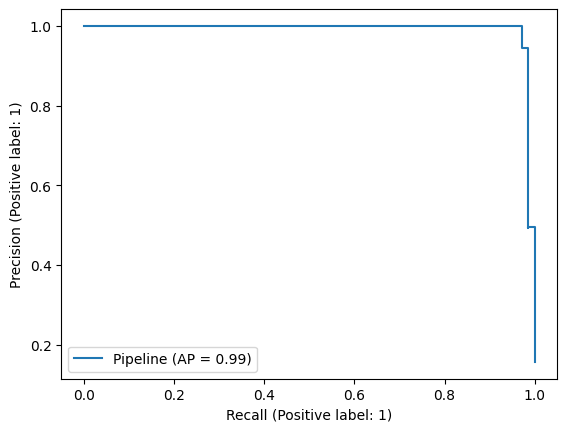

In [183]:
y_pred= best_svc_up.predict(X_test)
pr_svc = plot_precision_recall_curve(best_svc_up, X_test, y_test)